In [17]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/deperomm/anaconda2/envs/ser627a/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Lab 3

Today the lab is a bit more sparse on explanation, but I think it would be nice to drill down into gaussian mixture modeling. 

Let's start with the old faithful data you used in your homework:

In [18]:
from urllib2 import urlopen
path = 'faithful.txt'
remote = urlopen('https://raw.githubusercontent.com/aidiary/PRML/master/ch9/faithful.txt')
with open('faithful.txt', 'w') as f:
    f.write(remote.read())

<IPython.core.display.Javascript object>


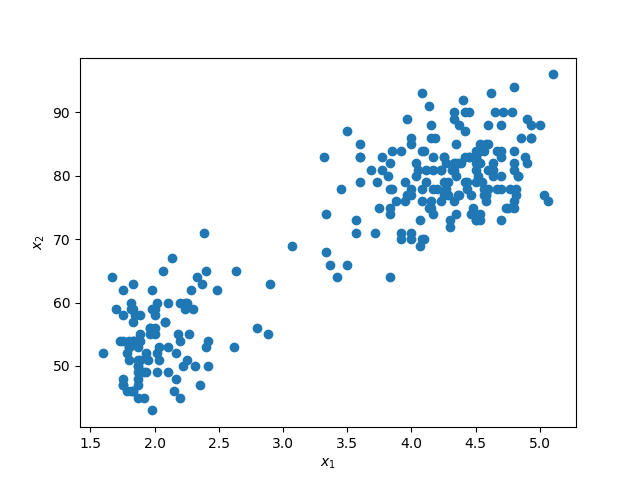

In [19]:
import pandas
df = pandas.read_csv(path, sep=' ', names=['x_1', 'x_2'])

x1 = df.loc[:,'x_1'].as_matrix()
x2 = df.loc[:,'x_2'].as_matrix()


figure()
scatter(x1, x2)
xlabel(r'$x_1$')
ylabel(r'$x_2$')
show()

Let's start with a marginal distribution

<IPython.core.display.Javascript object>


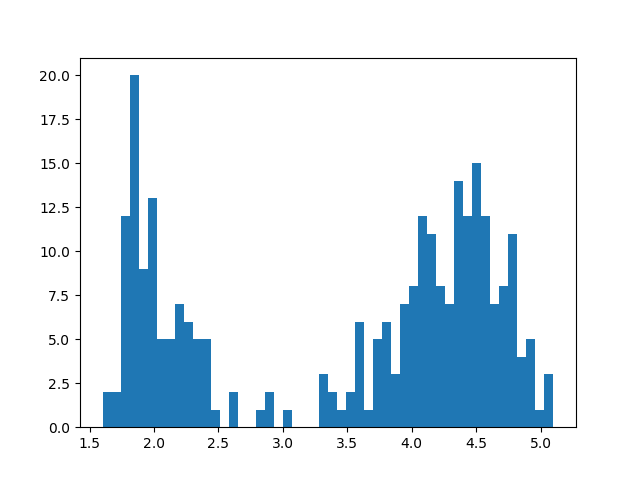

In [20]:
figure()
hist(x1, bins=50)
show()

This look's like maybe it is two Gaussians; let's focus on the one on the right. 

<IPython.core.display.Javascript object>


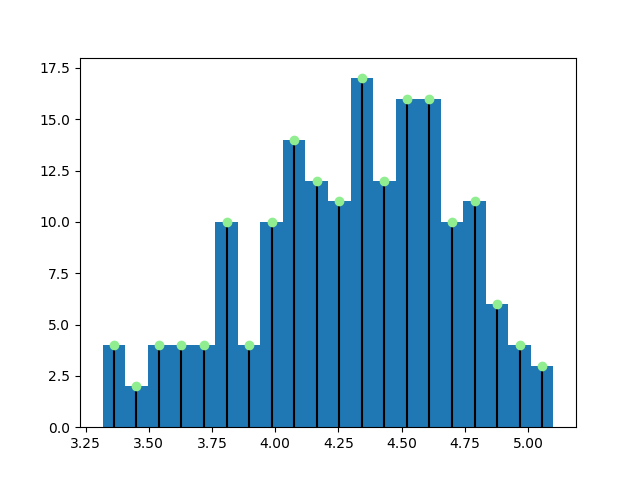

In [21]:
threshold = 3.25
x_r = x1[x1 > threshold]

figure()
hist(x_r, bins=20)
show()

In [22]:
freqs, edges = histogram(x_r, bins=20)
centers = (edges[:-1]+edges[1:])/2.

# This will be drawn on the figure above
vlines(centers, 0, freqs)
scatter(centers, freqs, color='lightgreen', zorder=2)
show()

# Challenge
Find the covariance and mean given `freqs` and `centers` only. 
Note that the input it not _samples_, it is a _sample value_ followed by a sample _wieight_

In [23]:
import numpy as np

def weighted_gaussian_fit(x, w):
    n = len(x)
    assert len(w) == n
    var = np.cov(x, fweights=w)
    mu = sum(x*w)/sum(w)
    return (mu, var)

The next cell lets you visualize the results. 

<IPython.core.display.Javascript object>


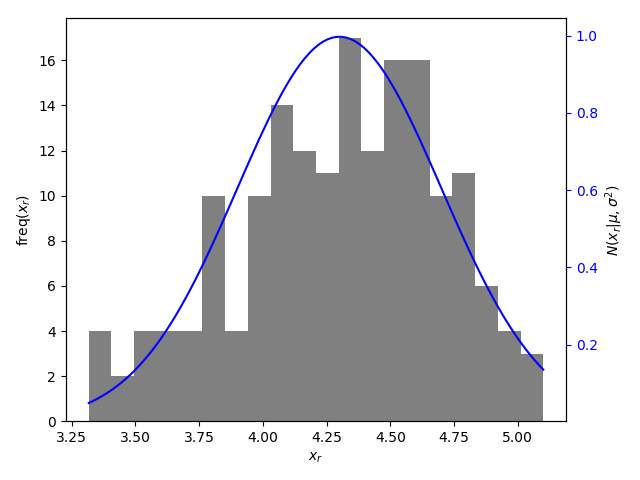

In [24]:
mu, var = weighted_gaussian_fit(centers, freqs)

x_fit = linspace(x_r.min(), x_r.max(), 100)
y_fit = (1./sqrt(2*pi*var))*exp(-((x_fit-mu)**2)/(2*var))

fig = figure()
hist(x_r, bins=20, color='grey', zorder=1)
xlabel(r'$x_r$')
ylabel(r'freq($x_r$)')

twinx()
ylabel('$N(x_r|\mu,\sigma^2)$')
tick_params('y', colors='blue')
plot(x_fit, y_fit, color='blue', zorder=2)
tight_layout()
show()

# Challenge
Now, let's extend that to a multivariate (2D) gaussian

In [25]:
x1_r = x_r
x2_r = x2[x1 > threshold ]

In [26]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


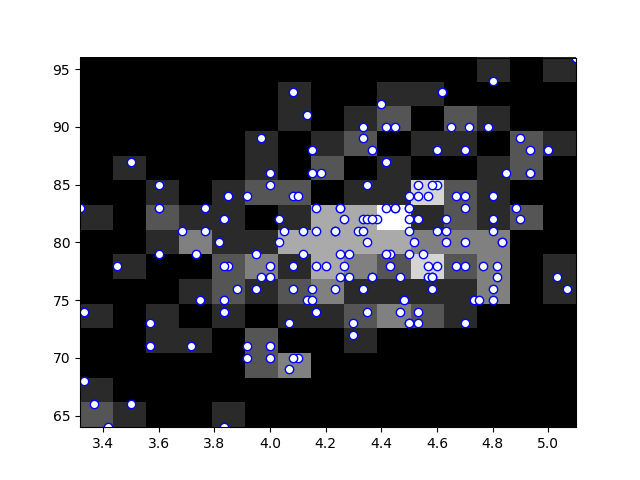

In [27]:
figure()
hist2d(x1_r, x2_r, bins=(15, 15), cmap=cm.gray)
scatter(x1_r, x2_r, edgecolor='blue', facecolor='white')
show()

In [28]:
freqs, x1_edges, x2_edges = histogram2d(x1_r, x2_r, bins=(15, 15))
x1_centers = (x1_edges[:-1] + x1_edges[1:])/2.
x2_centers = (x2_edges[:-1] + x2_edges[1:])/2.

In [29]:
x1_centers, x2_centers= meshgrid((x1_edges[:-1] + x1_edges[1:])/2., 
                                 (x2_edges[:-1] + x2_edges[1:])/2.)
x_centers = column_stack([x1_centers.flat, x2_centers.flat])
freqs = freqs.flatten()

Let's verify that we have coordinate pairs $(x_1, x_2)$ and frequencies aligned properly by visualizing the weighted points as circles of different sizes. 

<IPython.core.display.Javascript object>


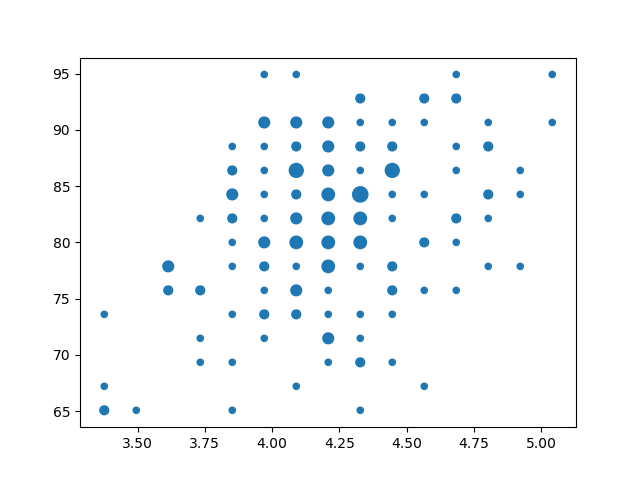

In [30]:
figure()
scatter(x_centers[:,0], x_centers[:,1], s=20*freqs)
show()

Now, the challenge is to find the **2D** gaussian function that is most likely. 

In [15]:
def weighted_mv_guassian_fit(x, w):
    n, m = x.shape
    assert w.shape == [n]
    cov = np.cov(x, fweights=w)
    mu = sum(x[:,0]*w)/sum(w),sum(x[:,1]*w)/sum(w)
    return (mu, cov)

# Challengs multiple 1D Gaussians
Returning to the original data, we thought that $x_1$  may have been a mixture of two gaussians.

Later, we may discuss Gaussian mixture models in more depth (PRML Ch. 9). 

For now, I will introduce a simple _K means_ algorithm, with pseudocode:

<img src="http://stanford.edu/~cpiech/cs221/img/kmeansMath.png"></img>

This algorithm solves _only_ for the means of a set of Gaussian's, and it assumes that they all have the same variance. 

In [48]:
def kmeans(x, k):
    # This algorithm iteratively reduces the negative log likelihood
    # It stops when two iterations result in the same cluster assignments 
    converged = False
    
    # Select `k` initial 'mus', e.g. using np.random.choice?
    mus = x[random.choice(len(x), k)]
    n = len(x)
    
    while not converged:
    
        #TODO: Calculate the cluster assignments (e.g. using numpy operations and np.argmax)
        assignments = argmin([[(mus[j]-x[i])**2 for j in range(k)] for i in range(n)], axis=1)
        
        old_mus = mus # TODO  (this is not the right thing to do....)
        
        mus = 
        
        converged = all(old_mus == mus)
        
        yield mus, clusters

In [49]:
process = kmeans(x1, 2)

If you keep evaluating the next cell, you will move through the algorithm one iteration at a time. 

<IPython.core.display.Javascript object>


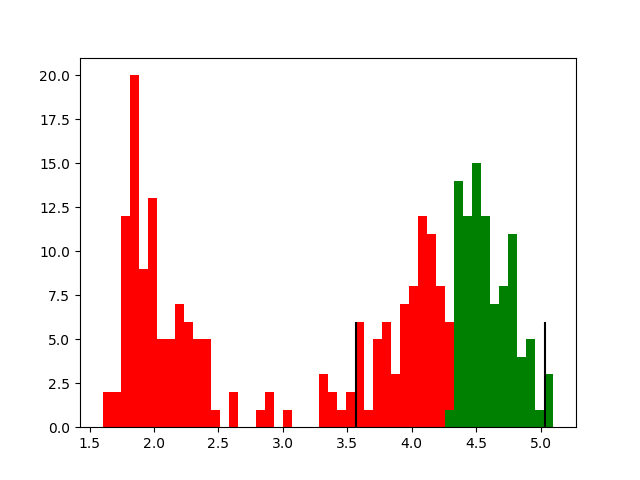

[1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1
 1 0 0 1 1 1 1 0 1 1 0 1 0]


In [50]:
# The plot will look incorrect until you fix the code above
figure()

mus, clusters = process.next()

x1_range = (x1.min(), x1.max())
hist(x1[clusters==0], bins=50, range=x1_range, color='red')
hist(x1[clusters==1], bins=50, range=x1_range, color='green')
vlines(mus, 0, freqs.max())

# More of the Same Challenge...
If you implemented the code above _just_ right (or if you edit it a bit), then it will work on multidimensional data as well. 
Give it a try:

In [186]:
process = kmeans(column_stack([x1, x2]), 2)

<IPython.core.display.Javascript object>


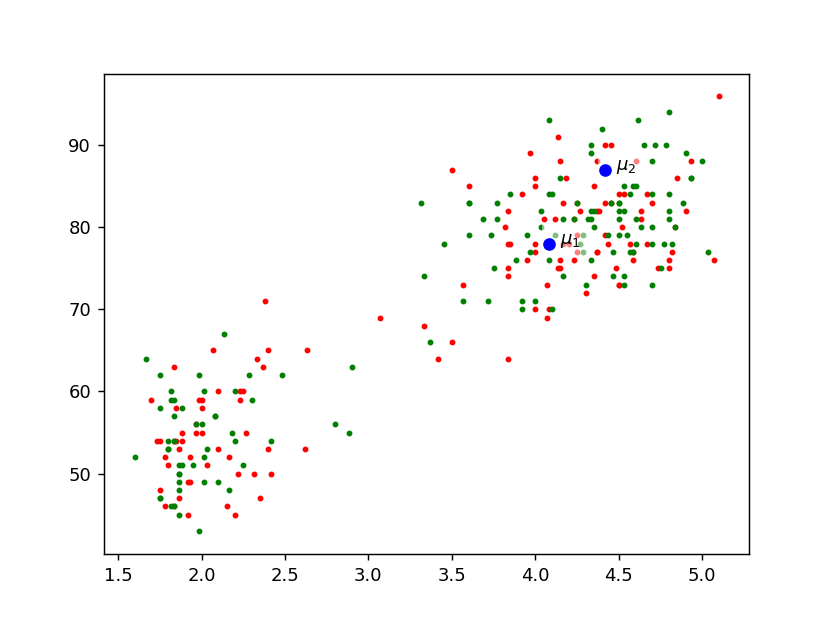

In [187]:
figure()

mus, clusters = process.next()

scatter(x1[clusters==0], x2[clusters==0], color='red', s=5)
scatter(x1[clusters==1], x2[clusters==1], color='green', s=5)
scatter(mus[:,0], mus[:,1], color='blue', zorder=3)
text(mus[0,0], mus[0,1], '  $\mu_1$',  bbox=dict(lw=0, facecolor='white', alpha=0.5), zorder=2)
text(mus[1,0], mus[1,1], '  $\mu_2$',  bbox=dict(lw=0, facecolor='white', alpha=0.5), zorder=2)
show()